In [1]:
from pulp import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
prob = LpProblem("Chebyshev Center",LpMaximize)

C:\Users\Shiro\Anaconda3\lib\site-packages\pulp\pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [5]:
coefficient = np.array([[ 2,  1],
                      [ 2, -1],
                      [-1,  2],
                      [-1, -2]])
b = np.ones([4,1], float)

In [6]:
radius = LpVariable('r', cat = LpContinuous)

In [7]:
x_c = LpVariable.matrix("coordinate",range(0,2), cat = LpContinuous)

In [8]:
prob += radius

In [9]:
for i in range(0, len(coefficient)):
    prob += lpSum([coefficient[i].T * x_c]+ radius * np.linalg.norm(coefficient[i])) <= b[i]

In [10]:
prob.solve()

1

In [11]:
value(prob.objective)

0.4472136

In [12]:
for v in prob.variables():
    print(v.name, "=", v.varValue)

coordinate_0 = 1.1180403e-12
coordinate_1 = 1.1180403e-12
r = 0.4472136


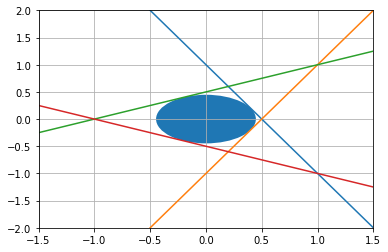

In [13]:
fig, ax = plt.subplots()

ax.set(xlim=(-1.5, 1.5), ylim = (-2, 2))

a_circle = plt.Circle((x_c[0].varValue,x_c[1].varValue), radius.varValue)
ax.add_artist(a_circle)
x = np.linspace(-1.5,1.5,100)
for i in range(0, 4):
    ax.plot(x, (b[i] - coefficient[i][0] * x)/coefficient[i][1], label = 'x * ' + str(coefficient[i][0])+' + y * ' + str(coefficient[i][1]) + ' = ' + str(b[i]))
plt.grid()
plt.show()

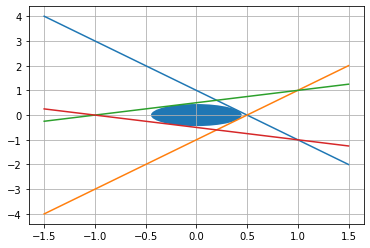

In [15]:
cir = plt.Circle((x_c[0].varValue,x_c[1].varValue), radius.varValue)

x = np.linspace(-1.5,1.5,100)
for i in range(0, 4):
    plt.plot(x, (b[i] - coefficient[i][0] * x)/coefficient[i][1], label = 'x * ' + str(coefficient[i][0])+' + y * ' + str(coefficient[i][1]) + ' = ' + str(b[i]))

plt.gcf().gca().add_artist(cir)
plt.grid()
plt.show()